In [1]:
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import matplotlib as mpl
import netCDF4 as ncdf
import pandas as pd
import os
%matplotlib notebook

In [2]:
from moa_python.post_plane import Post_plane
import moa_python.post_analysis as analysis

In [3]:
case_folder = '../../amr-wind-runs/baseline'
hor_plane_file = 'post_processing/samplingPlane18000.nc'
ver_plane_file = 'post_processing/samplingSlice18000.nc'
full_filename_hor_plane = os.path.join(case_folder,hor_plane_file)
full_filename_ver_plane = os.path.join(case_folder,ver_plane_file)

In [4]:
rot_diam = 126
hub_height = 90

hor_plane = Post_plane(full_filename_hor_plane,40)
ver_plane = Post_plane(full_filename_ver_plane,40)
hor_plane.set_origin(x = 2560, y = 2560, frame = 'amr-wind')
ver_plane.set_origin(center='x')
hor_plane.scale_to_rot_diam(rot_diam)
ver_plane.scale_to_rot_diam(rot_diam)

Plane has 1 plane(s) in 21 time steps from 18000.0 to 19999.999999970896
Plane offsets: [90.]
Plane has 3 plane(s) in 21 time steps from 18000.0 to 19999.999999970896
Plane offsets: [3245.02503368 3875.02503368 4505.02503368]


<IPython.core.display.Javascript object>


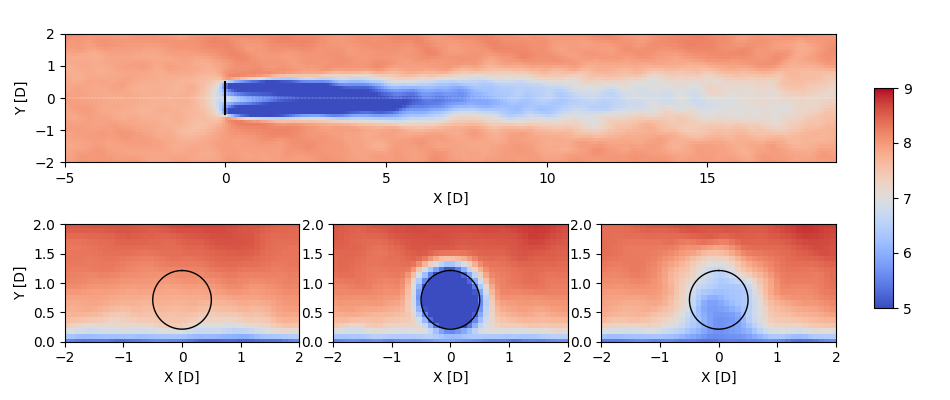

Plotting u mean velocity for plane at location 0.7142857142857143
Nearest plane to 0.7142857142857143 is 0.7142857142857143
Returning u mean velocity plane for slice at 0.7142857142857143
Plotting u mean velocity for plane at location 25.754166933971227
Nearest plane to 25.754166933971227 is 25.754166933971227
Returning u mean velocity plane for slice at 25.754166933971227
Plotting u mean velocity for plane at location 30.754166933971227
Nearest plane to 30.754166933971227 is 30.754166933971227
Returning u mean velocity plane for slice at 30.754166933971227
Plotting u mean velocity for plane at location 35.75416693397123
Nearest plane to 35.75416693397123 is 35.75416693397123
Returning u mean velocity plane for slice at 35.75416693397123


In [5]:
analysis.combine_plots([hor_plane,ver_plane],mean=True,time=19600,vmin=5,vmax=9,ylim=[-2,2],hub_height=hub_height/rot_diam,colormap='coolwarm')

In [ ]:
hor_plane.set_origin(x = 2560, y = 2560, frame = 'amr-wind')
ax = hor_plane.plot_plane(240, 19200, vmin=5., vmax=11.)
ax.set_title("Velocity plane - top view");
im = [obj for obj in ax.get_children() if isinstance(obj, mpl.collections.Collection)][0]
im.colorbar.remove()

In [ ]:
full_filename_slice = os.path.join(case_folder,ver_plane_file)
ver_plane = Post_plane(full_filename_slice)

In [ ]:
ver_plane.set_origin(center='x')
fig,ax = plt.subplots(1,ver_plane.z_N,constrained_layout = True)
for n in range(ver_plane.z_N):
    ax[n] = ver_plane.plot_plane(ver_plane.z[n], 19900, ax = ax[n], vmin=5., vmax=11.)
    ax[n].set_title(f'Slice at {ver_plane.z[n]}')
    im = [obj for obj in ax[n].get_children() if isinstance(obj, mpl.collections.Collection)][0]
    if im:
        im.colorbar.remove()
fig.colorbar(im,ax=ax,location='bottom')

In [ ]:
def func(**kwargs):
    def check(attribute,default=None):
        if not attribute in kwargs.keys():
            kwargs[attribute] = default
        return kwargs[attribute]
    
    print(check('a',3))
    print(check('b',4))
    
func(a=1)

In [ ]:
hor_plane.amr_origin = hor_plane.dataset.groups[hor_plane.plane].origin[0:2]
shift_in_origin = np.array([2560,2560]) - hor_plane.amr_origin
normal = hor_plane.dataset.groups[hor_plane.plane].axis1/np.sqrt(hor_plane.dataset.groups[hor_plane.plane].axis1.dot(hor_plane.dataset.groups[hor_plane.plane].axis1))
print(hor_plane.amr_origin)
print(shift_in_origin)
x = hor_plane.x - (normal[0]*shift_in_origin[0]+normal[1]*shift_in_origin[1])
y = hor_plane.y - (normal[0]*shift_in_origin[1]-normal[1]*shift_in_origin[0])

In [ ]:
ver_plane.z_dir